In [2]:
import cv2
import pandas as pd 
import numpy as np
import os 
import matplotlib as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization, Dropout, Dense,
    Flatten, Input
)

In [3]:
label=pd.read_csv("labels.csv")
classid=label['ClassId'].tolist()
labelname=label['Name'].tolist()
number_of_classes=len(label)


In [4]:
import os
import cv2
import numpy as np

data = []
labels = []
image_size = 32  # standard for traffic signs

dataset_path = "dataset/DATA"
class_names = os.listdir(dataset_path)  # e.g., ['Stop', 'SpeedLimit', 'TurnLeft']
label_namesid= [int(i) for i in class_names]


for label, class_name in zip(label_namesid,class_names):
    class_folder = os.path.join(dataset_path, class_name)
    print(class_folder)
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue  # skip unreadable images

        img = cv2.resize(img, (image_size, image_size))
        data.append(img)
        labels.append(label)

X = np.array(data)
y = np.array(labels)

print("Loaded images:", X.shape)
print("Labels:", y.shape)


dataset/DATA\0
dataset/DATA\1
dataset/DATA\10
dataset/DATA\11
dataset/DATA\12
dataset/DATA\13
dataset/DATA\14
dataset/DATA\15
dataset/DATA\16
dataset/DATA\17
dataset/DATA\18
dataset/DATA\19
dataset/DATA\2
dataset/DATA\20
dataset/DATA\21
dataset/DATA\22
dataset/DATA\23
dataset/DATA\24
dataset/DATA\25
dataset/DATA\26
dataset/DATA\27
dataset/DATA\28
dataset/DATA\29
dataset/DATA\3
dataset/DATA\30
dataset/DATA\31
dataset/DATA\32
dataset/DATA\33
dataset/DATA\34
dataset/DATA\35
dataset/DATA\36
dataset/DATA\37
dataset/DATA\38
dataset/DATA\39
dataset/DATA\4
dataset/DATA\40
dataset/DATA\41
dataset/DATA\42
dataset/DATA\43
dataset/DATA\44
dataset/DATA\45
dataset/DATA\46
dataset/DATA\47
dataset/DATA\48
dataset/DATA\49
dataset/DATA\5
dataset/DATA\50
dataset/DATA\51
dataset/DATA\52
dataset/DATA\53
dataset/DATA\54
dataset/DATA\55
dataset/DATA\56
dataset/DATA\57
dataset/DATA\6
dataset/DATA\7
dataset/DATA\8
dataset/DATA\9
Loaded images: (4170, 32, 32, 3)
Labels: (4170,)


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = X / 255.0  # Normalize pixel values
y = to_categorical(y)  # One-hot encode class labels

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(number_of_classes, activation='softmax')  # dynamic output layer
])


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
history=model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
53/53 [==============================] - 4s 54ms/step - loss: 3.4282 - accuracy: 0.1730 - val_loss: 2.8549 - val_accuracy: 0.2686
Epoch 2/20
53/53 [==============================] - 2s 44ms/step - loss: 2.6707 - accuracy: 0.3052 - val_loss: 2.2158 - val_accuracy: 0.3897
Epoch 3/20
53/53 [==============================] - 2s 44ms/step - loss: 2.1423 - accuracy: 0.4056 - val_loss: 1.6944 - val_accuracy: 0.5540
Epoch 4/20
53/53 [==============================] - 2s 40ms/step - loss: 1.6358 - accuracy: 0.5417 - val_loss: 1.1497 - val_accuracy: 0.6847
Epoch 5/20
53/53 [==============================] - 2s 44ms/step - loss: 1.2122 - accuracy: 0.6607 - val_loss: 0.8848 - val_accuracy: 0.7446
Epoch 6/20
53/53 [==============================] - 2s 44ms/step - loss: 0.9568 - accuracy: 0.7185 - val_loss: 0.6231 - val_accuracy: 0.8225
Epoch 7/20
53/53 [==============================] - 2s 40ms/step - loss: 0.7363 - accuracy: 0.7800 - val_loss: 0.5136 - val_accuracy: 0.8549
Epoch 8/20
53

In [9]:
model.save("traffic_sign_model.h5")


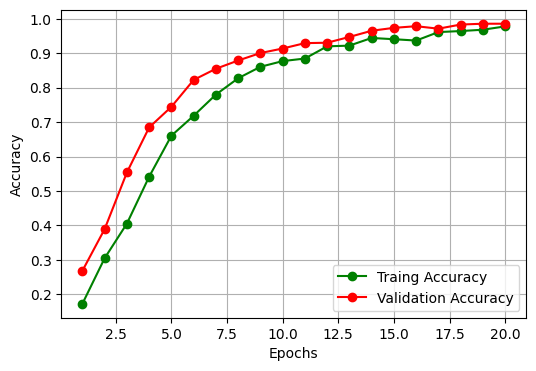

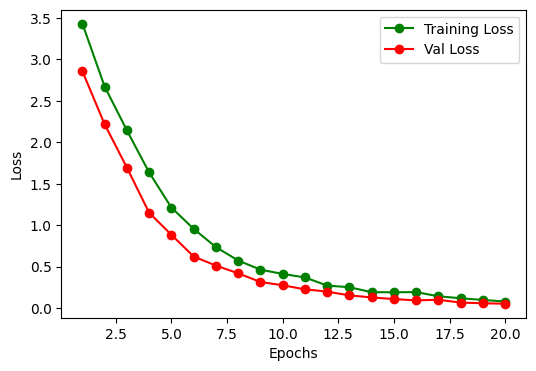

In [93]:
import matplotlib 
import matplotlib .pyplot as plt
train_loss =history.history["loss"]
train_ac=history.history["accuracy"]
val_loss =history.history["val_loss"]
val_ac=history.history["val_accuracy"]
#epochs=len(train_ac)
epochs   = range( 1,len(train_loss) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs,train_ac,"o-",color="green",label="Traing Accuracy")
plt.plot(epochs,val_ac,"o-",color="red",label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(epochs,train_loss,"o-",color="green",label="Training Loss")
plt.plot(epochs,val_loss,"o-",color="red",label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid
plt.show()


In [125]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,classification_report
predict=model.predict(X_test)
predict_encode=np.argmax(predict,axis=1)

y_test_encode=np.argmax(y_test,axis=1)
classes = np.unique(y_test_encode)  
print ("                                     Traffic Sign prediction ")
print(classification_report(
    y_test_encode,
    predict_encode,
    labels=classes,
    target_names=labelname
))



27/27 [==============================] - 0s 12ms/step
                                     Traffic Sign prediction 
                              precision    recall  f1-score   support

         Speed limit (5km/h)       1.00      1.00      1.00        30
        Speed limit (15km/h)       1.00      1.00      1.00        11
        Speed limit (30km/h)       0.85      1.00      0.92        11
        Speed limit (40km/h)       1.00      1.00      1.00        42
        Speed limit (50km/h)       1.00      1.00      1.00        16
        Speed limit (60km/h)       1.00      1.00      1.00        41
        Speed limit (70km/h)       1.00      1.00      1.00        18
        speed limit (80km/h)       1.00      0.94      0.97        36
    Dont Go straight or left       1.00      1.00      1.00         1
   Dont Go straight or Right       1.00      1.00      1.00        20
            Dont Go straight       1.00      1.00      1.00        31
                Dont Go Left       1.00    

c:\Users\Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:2628: UserWarning: labels size, 52, does not match size of target_names, 58
  warnings.warn(


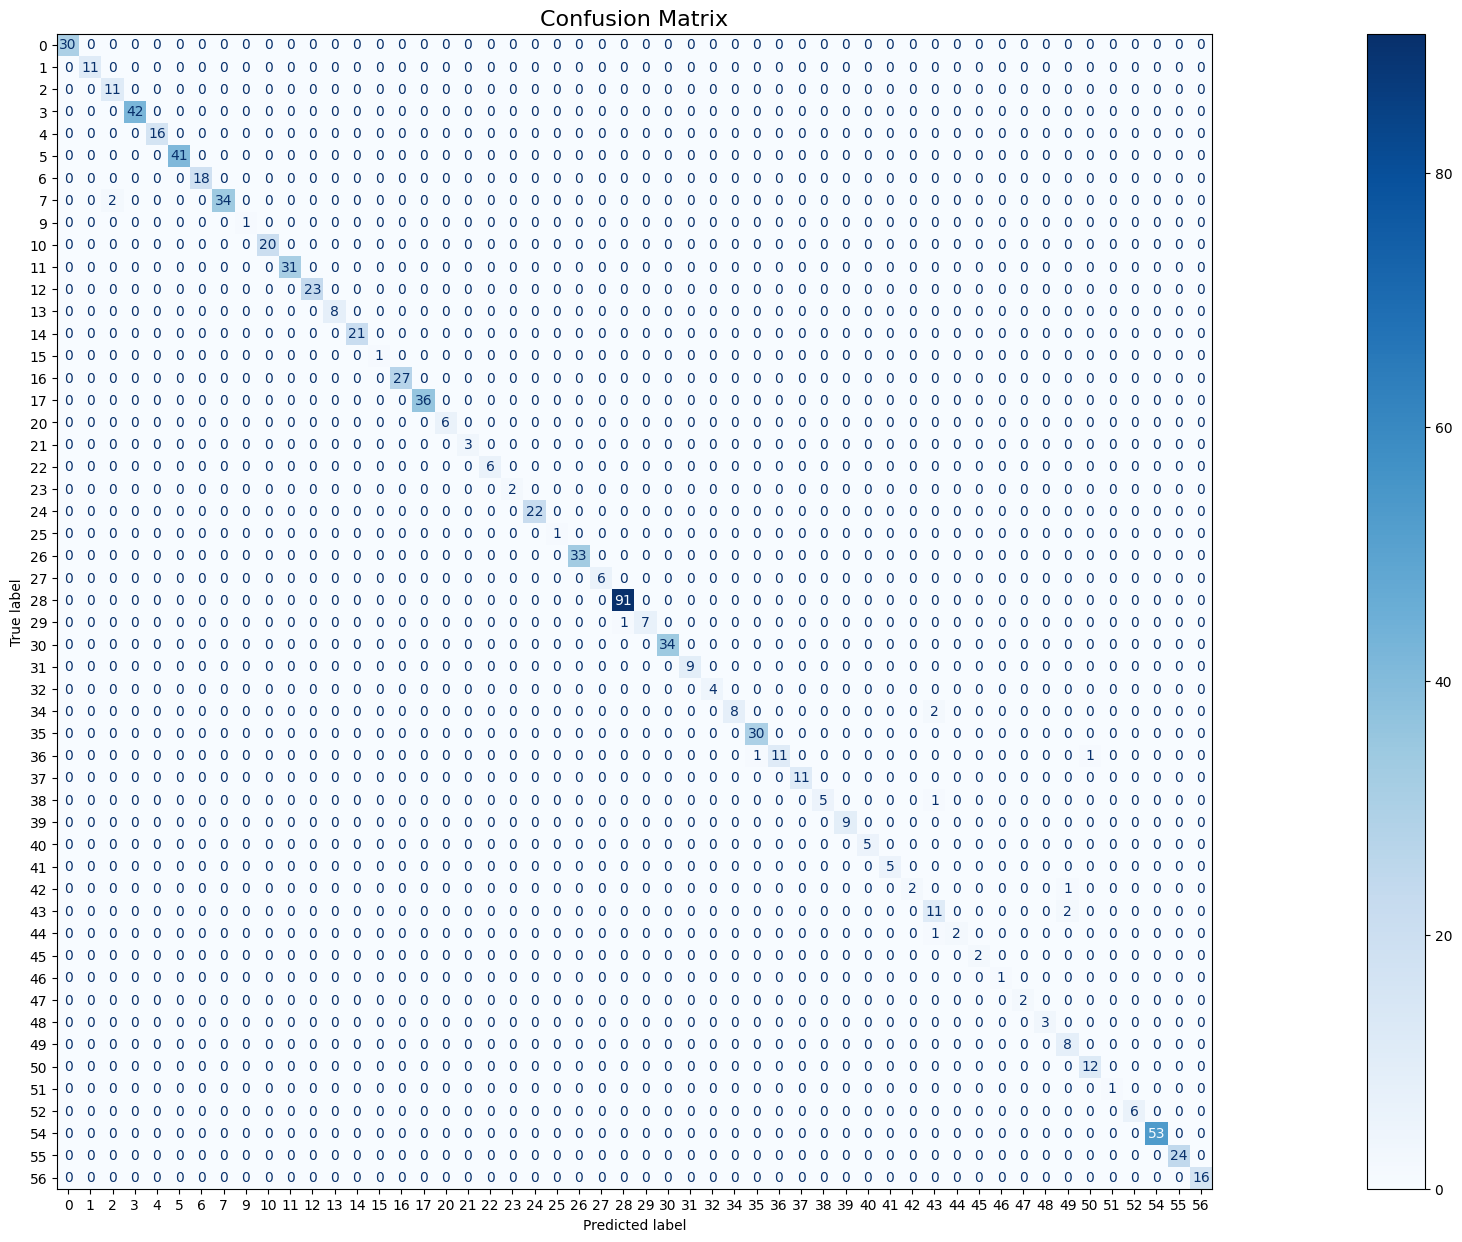

In [116]:
fig, ax = plt.subplots(figsize=(40,15))
display = ConfusionMatrixDisplay.from_predictions(
    y_test_encode,
    predict_encode,
     # only matching names
    ax=ax,
    cmap="Blues"
)
display.ax_.set_title("Confusion Matrix",fontsize=16)
plt.show()


In [117]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

# Load saved model
model = load_model("traffic_sign_model.h5")

# Load class names (order should match training)
class_names = sorted(os.listdir("dataset"))  # adjust path if needed


In [118]:

img_path = "test1.png"  # your image path here

# Load and preprocess the image
img = cv2.imread(img_path)
img = cv2.resize(img, (32, 32))        # match training size
img_normalized = img / 255.0           # normalize like training
img_input = img_normalized.reshape(1, 32, 32, 3)  # reshape for model


In [119]:
prediction = model.predict(img_input)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction)


print(f"Predicted Class: {predicted_class} ({confidence * 100:.2f}%)")
cv2.putText(img, f"{label} ({confidence*100:.1f}%)", (5, 25),
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

cv2.imshow("Prediction", img)

cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 0s 272ms/step
Predicted Class: 0 (97.92%)
